In [5]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [6]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN


In [7]:
df.dtypes

idade               float64
tempo_educacao        int64
estado_civil         object
cor                  object
sexo                 object
horas_por_semana      int64
salario_anual        object
nome                float64
dívida              float64
dtype: object

# NULL VARIABLES?

In [8]:
df.isnull().sum()
#R: Idade, nome, divida

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

# Looking the categorical variables to 'estado_civil', 'cor' e 'sexo'

In [9]:
print(df.sexo.unique())
print(df.estado_civil.unique())
print(df.cor.unique())

['Male' 'Female' '?']
['Never-married' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Married-AF-spouse' 'Widowed' 'Married-spouse-absent']
['White' 'Black' 'Other' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo']


# The variables are categorical, I saw a problem in the SEXO, this variable have a (?)

# Processing null variables

In [10]:
moda_variavel_idade = df.idade.value_counts().idxmax()
#moda_variavel_idade

df.idade.fillna(moda_variavel_idade)
df.nome.fillna('sem_nome')

0        sem_nome
1        sem_nome
2        sem_nome
3        sem_nome
4        sem_nome
           ...   
29165    sem_nome
29166    sem_nome
29167    sem_nome
29168    sem_nome
29169    sem_nome
Name: nome, Length: 29170, dtype: object

In [11]:
df.loc[df.idade == 36,:]

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
52,36.0,9,Married-civ-spouse,White,Male,40,<=50K,NaN,NaN
96,36.0,9,Never-married,White,Female,40,<=50K,NaN,NaN
126,36.0,9,Widowed,White,Female,24,<=50K,NaN,NaN
169,36.0,10,Divorced,White,Male,40,<=50K,NaN,NaN
178,36.0,13,Married-civ-spouse,Black,Male,36,>50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29042,36.0,13,Married-civ-spouse,White,Male,55,>50K,NaN,NaN
29074,36.0,13,Married-civ-spouse,White,Male,50,>50K,NaN,NaN
29076,36.0,13,Married-civ-spouse,White,Male,45,>50K,NaN,NaN
29090,36.0,12,Married-civ-spouse,White,Male,52,>50K,NaN,NaN


# "MinMax" in the variable 'tempo_educacao' AND  "StandardScaler" in the variable 'horas_por_semana'.

information about ~ tempo_educacao (MinMax):

count    29170.000000
mean         0.611297
std          0.159664
min          0.000000
25%          0.533333
50%          0.600000
75%          0.733333
max          1.000000
dtype: float64


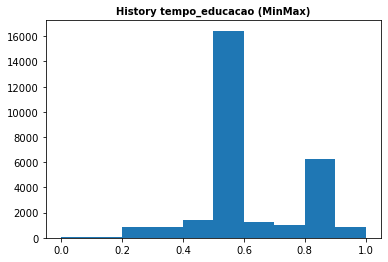

In [13]:
import matplotlib.pyplot as plt

X = df.tempo_educacao.values
M = np.max(X)
m = np.min(X)
X_minmax = (X - m) / (M-m)
print("information about ~ tempo_educacao (MinMax):\n")
print(pd.Series(X_minmax).describe())
plt.title("History tempo_educacao (MinMax)", fontsize = 10, fontweight = 'bold')
plt.hist(X_minmax)
plt.show()

In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ss_scaler = StandardScaler()

X = df.horas_por_semana.values.reshape(-1,1)
ss_scaler.fit(X)
ss_scaler.transform(X)

array([[-0.03605983],
       [-2.21049975],
       [-0.03605983],
       ...,
       [-0.03605983],
       [-1.64675606],
       [-0.03605983]])

# ohe-hot-encoding In the variables 'estado_civil', 'cor' e 'sexo
   
Sexo:
Masculino = 0;
Feminino = 1;
E para variável cidade:

Cor:
White = 0
Black = 1
Other = 2
Asian-Pac-Islander = 3
Amer-Indian-Eskimo = 4

Estado Civil
Never-married  = 0
Married-civ-spouse  = 1
Divorced = 2
Separated = 3 
Married-AF-spouse = 4
Widowed = 5 
Married-spouse-absent = 6

In [94]:
dic_variavelSexo = {"Male":0, "Female":1}
dic_variavelCor = {"White":0, "Black":1, "Other":2, "Asian-Pac-Islander":3, "Amer-Indian-Eskimo":4}
dic_variavelEC = {"Never-married":0, "Married-civ-spouse":1, "Divorced":2, "Separated":3, "Married-AF-spouse":4, "Widowed":5, "Married-spouse-absent":6}

dados = df
dados['sexo']          = dados.sexo.map(dic_variavelSexo)
dados['cor']           = dados.cor.map(dic_variavelCor)
dados['estado_civil']  = dados.estado_civil.map(dic_variavelEC)
dados

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,0,0,0.0,40,<=50K,NaN,NaN
1,50.0,13,1,0,0.0,13,<=50K,NaN,NaN
2,38.0,9,2,0,0.0,40,<=50K,NaN,NaN
3,53.0,7,1,1,0.0,40,<=50K,NaN,NaN
4,37.0,14,1,0,1.0,40,<=50K,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29165,27.0,12,1,0,1.0,38,<=50K,NaN,NaN
29166,40.0,9,1,0,0.0,40,>50K,NaN,NaN
29167,58.0,9,5,0,1.0,40,<=50K,NaN,NaN
29168,22.0,9,0,0,0.0,20,<=50K,NaN,NaN


# Erasing the outliers in the variable 'idade'. 

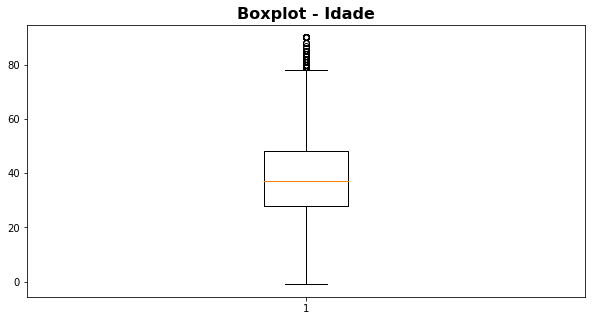

In [14]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df['idade'] = df['idade'].fillna(-1)
plt.figure(figsize=[10,5])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(df.idade)
plt.show()
#df.boxplot(column="idade")


In [15]:
iqr = np.percentile(df.idade, 75) - np.percentile(df.idade, 25)
limite_inf = np.maximum(np.percentile(df.idade, 25) - 1.5 * iqr, np.min(df.idade))
limite_sup = np.minimum(np.percentile(df.idade, 75) + 1.5 * iqr, np.max(df.idade))


In [16]:
df['outlier_idade']= np.where((df.idade < limite_inf) | (df.idade > limite_sup), 1, 0)

In [17]:
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN,0
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,NaN,NaN,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,NaN,NaN,0
29167,58.0,9,Widowed,White,Female,40,<=50K,NaN,NaN,0
29168,22.0,9,Never-married,White,Male,20,<=50K,NaN,NaN,0
